## Exploration of feature transformations

In [7]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve


pd.set_option("display.max_columns", 100)

df = pd.read_csv("../data/cox-violent-parsed.csv")
print(f"Raw dataset shape: {df.shape}")
df.head()

Raw dataset shape: (18316, 52)


,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,days_b_screening_arrest,c_jail_in,c_jail_out,c_case_number,c_offense_date,c_arrest_date,c_days_from_compas,c_charge_degree,c_charge_desc,is_recid,r_case_number,r_charge_degree,r_days_from_arrest,r_offense_date,r_charge_desc,r_jail_in,r_jail_out,violent_recid,is_violent_recid,vr_case_number,vr_charge_degree,vr_offense_date,vr_charge_desc,type_of_assessment,decile_score.1,score_text,screening_date,v_type_of_assessment,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event
0,1.0,miguel hernandez,miguel,hernandez,14/08/2013,Male,18/04/1947,69,Greater than 45,Other,0,1,0,0,0,-1.0,13/08/2013 6:03,14/08/2013 5:41,13011352CF10A,13/08/2013,NaN,1.0,(F3),Aggravated Assault w/Firearm,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,1,Low,14/08/2013,Risk of Violence,1,Low,14/08/2013,07/07/2014,14/07/2014,0,0,327,0
1,2.0,miguel hernandez,miguel,hernandez,14/08/2013,Male,18/04/1947,69,Greater than 45,Other,0,1,0,0,0,-1.0,13/08/2013 6:03,14/08/2013 5:41,13011352CF10A,13/08/2013,NaN,1.0,(F3),Aggravated Assault w/Firearm,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,1,Low,14/08/2013,Risk of Violence,1,Low,14/08/2013,07/07/2014,14/07/2014,0,334,961,0
2,3.0,michael ryan,michael,ryan,31/12/2014,Male,06/02/1985,31,25 - 45,Caucasian,0,5,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,5,Medium,31/12/2014,Risk of Violence,2,Low,31/12/2014,30/12/2014,03/01/2015,0,3,457,0
3,4.0,kevon dixon,kevon,dixon,27/01/2013,Male,22/01/1982,34,25 - 45,African-American,0,3,0,0,0,-1.0,26/01/2013 3:45,05/02/2013 5:36,13001275CF10A,26/01/2013,NaN,1.0,(F3),Felony Battery w/Prior Convict,1,13009779CF10A,(F3),NaN,05/07/2013,Felony Battery (Dom Strang),NaN,NaN,NaN,1,13009779CF10A,(F3),05/07/2013,Felony Battery (Dom Strang),Risk of Recidivism,3,Low,27/01/2013,Risk of Violence,1,Low,27/01/2013,26/01/2013,05/02/2013,0,9,159,1
4,5.0,ed philo,ed,philo,14/04/2013,Male,14/05/1991,24,Less than 25,African-American,0,4,0,1,4,-1.0,13/04/2013 4:58,14/04/2013 7:02,13005330CF10A,13/04/2013,NaN,1.0,(F3),Possession of Cocaine,1,13011511MM10A,(M1),0.0,16/06/2013,Driving Under The Influence,16/06/2013,16/06/2013,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,4,Low,14/04/2013,Risk of Violence,3,Low,14/04/2013,16/06/2013,16/06/2013,4,0,63,0


Feature transformation: 

Before transforming features to fit normal distributions, we have to identify the underlying distributions. Let's try log-normal through plotting: If the result is more bell-shaped, log-normal is likely the distribution.

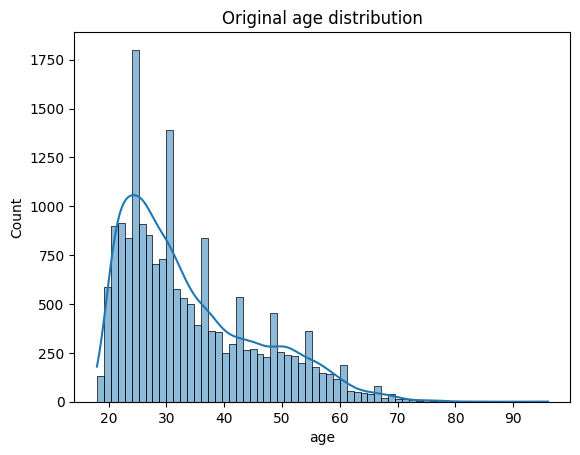

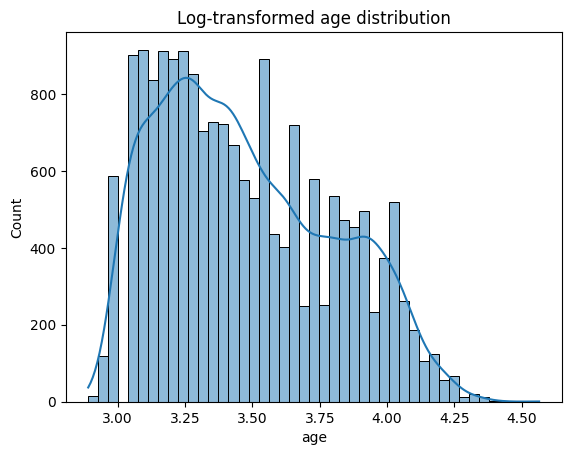

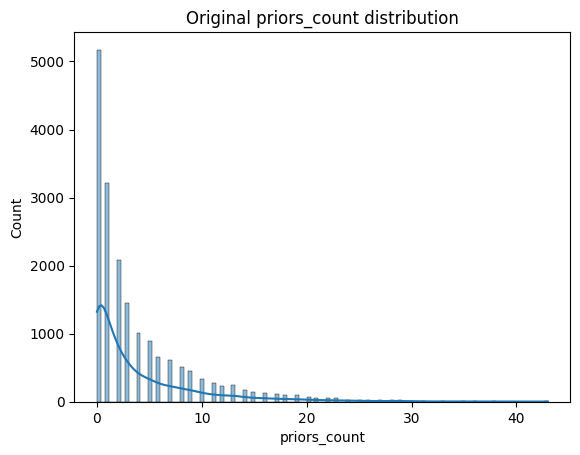

c:\Users\wastl\modelengineering\venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


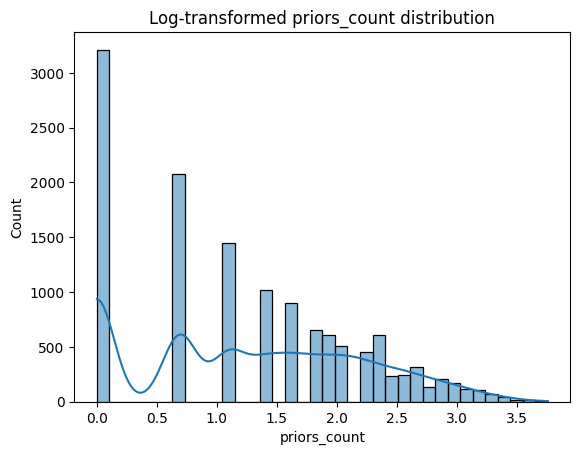

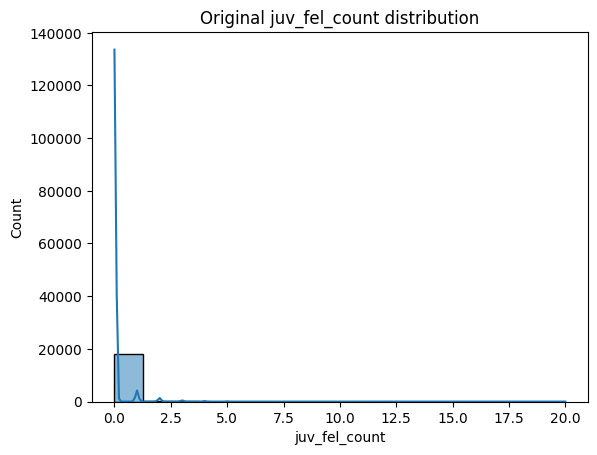

c:\Users\wastl\modelengineering\venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


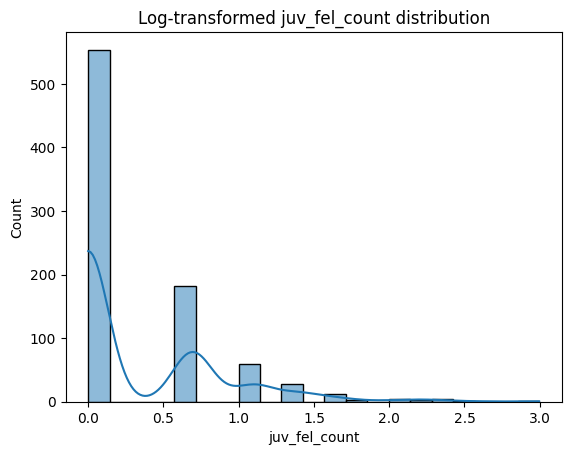

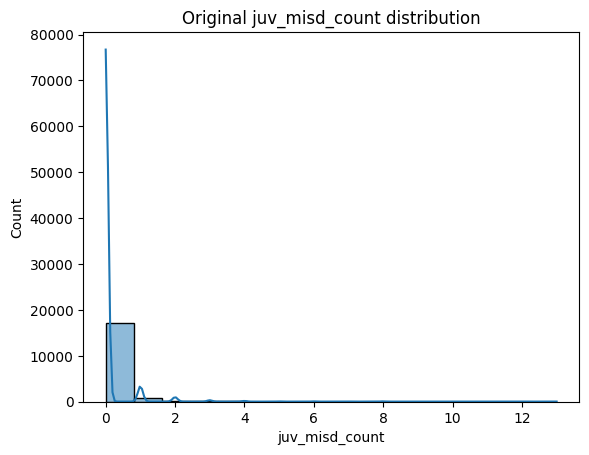

c:\Users\wastl\modelengineering\venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


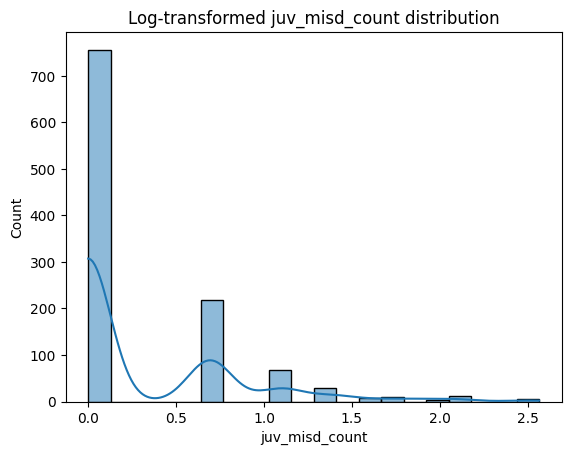

In [8]:
# Plot original age
sns.histplot(df["age"], kde=True)
plt.title("Original age distribution")
plt.show()

# Plot log-transformed age
sns.histplot(np.log(df["age"]), kde=True)
plt.title("Log-transformed age distribution")
plt.savefig("../reports/01_data_exploration/log-transformed_age_dist.png")
plt.show()
plt.close()

# Plot original priors_count
sns.histplot(df["priors_count"], kde=True)
plt.title("Original priors_count distribution")
plt.show()

# Plot log-transformed priors_count
sns.histplot(np.log(df["priors_count"]), kde=True)
plt.title("Log-transformed priors_count distribution")
plt.savefig("../reports/01_data_exploration/log-transformed_priors_count_dist.png")
plt.show()
plt.close()

# Plot original juv_fel_count
sns.histplot(df["juv_fel_count"], kde=True)
plt.title("Original juv_fel_count distribution")
plt.show()

# Plot log-transformed juv_fel_count
sns.histplot(np.log(df["juv_fel_count"]), kde=True)
plt.title("Log-transformed juv_fel_count distribution")
plt.savefig("../reports/01_data_exploration/log-transformed_juv_fel_count_dist.png")
plt.show()
plt.close()

# Plot original juv_misd_count
sns.histplot(df["juv_misd_count"], kde=True)
plt.title("Original juv_misd_count distribution")
plt.show()

# Plot log-transformed juv_misd_count
sns.histplot(np.log(df["juv_misd_count"]), kde=True)
plt.title("Log-transformed juv_misd_count distribution")
plt.savefig("../reports/01_data_exploration/log-transformed_juv_misd_count_dist.png")
plt.show()
plt.close()

Feature Transformation: 
To further test out if transformation improves data quality, run a baseline logistic regression with and without transformation and compare AUC/accuracy. If it improves, keep it, otherwise discard transformations.
- Without transformations
- With log1p-transformed features

Without Log1p Transformation - Accuracy: 0.693 | AUC: 0.696
With Log1p Transformation    - Accuracy: 0.706 | AUC: 0.709


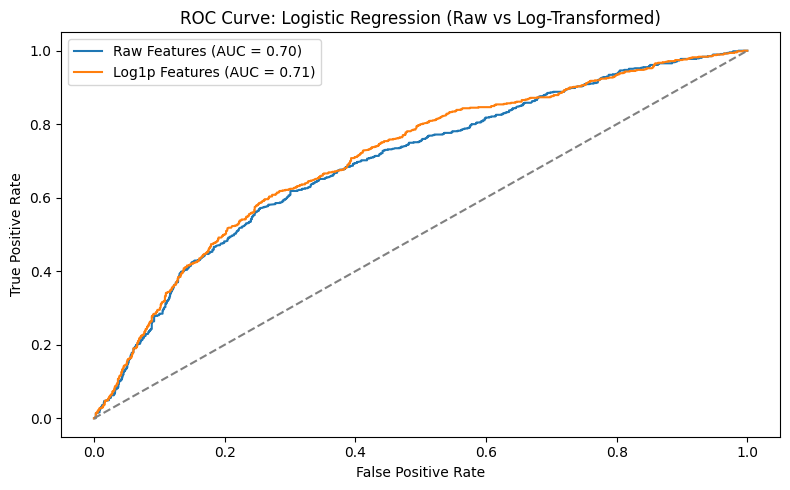

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from sklearn.preprocessing import OrdinalEncoder

# === Load preprocessed dataset ===
df = pd.read_csv("../data/cox-violent-preprocessed.csv")

# === Encode categorical features ===
df_encoded = df.copy()
encoder = OrdinalEncoder()
cat_features = ["sex", "c_charge_degree", "c_charge_desc"]

df_encoded[cat_features] = encoder.fit_transform(df_encoded[cat_features])

# === Define features and target ===
features = ["age", "juv_misd_count", "juv_fel_count", "priors_count", 
            "sex", "c_charge_degree", "c_charge_desc"]
target = "is_recid"

# === Create log-transformed version ===
df_log = df_encoded.copy()
for col in ["age", "juv_misd_count", "juv_fel_count", "priors_count"]:
    df_log[col] = np.log1p(df_log[col])

# === Train/test split (same for both versions) ===
X_raw = df_encoded[features]
X_log = df_log[features]
y = df_encoded[target]

X_train_raw, X_test_raw, y_train, y_test = train_test_split(X_raw, y, test_size=0.2, random_state=42)
X_train_log, X_test_log, _, _ = train_test_split(X_log, y, test_size=0.2, random_state=42)

# === Fit models ===
model_raw = LogisticRegression(max_iter=1000).fit(X_train_raw, y_train)
model_log = LogisticRegression(max_iter=1000).fit(X_train_log, y_train)

# === Predict ===
y_prob_raw = model_raw.predict_proba(X_test_raw)[:, 1]
y_prob_log = model_log.predict_proba(X_test_log)[:, 1]
y_pred_raw = model_raw.predict(X_test_raw)
y_pred_log = model_log.predict(X_test_log)

# === Metrics ===
acc_raw = accuracy_score(y_test, y_pred_raw)
acc_log = accuracy_score(y_test, y_pred_log)
auc_raw = roc_auc_score(y_test, y_prob_raw)
auc_log = roc_auc_score(y_test, y_prob_log)

# === Output ===
print("Without Log1p Transformation - Accuracy:", round(acc_raw, 3), "| AUC:", round(auc_raw, 3))
print("With Log1p Transformation    - Accuracy:", round(acc_log, 3), "| AUC:", round(auc_log, 3))

# === Plot ROC Curves ===
fpr_raw, tpr_raw, _ = roc_curve(y_test, y_prob_raw)
fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log)

plt.figure(figsize=(8, 5))
plt.plot(fpr_raw, tpr_raw, label=f"Raw Features (AUC = {auc_raw:.2f})")
plt.plot(fpr_log, tpr_log, label=f"Log1p Features (AUC = {auc_log:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve: Logistic Regression (Raw vs Log-Transformed)")
plt.legend()
plt.tight_layout()
plt.savefig("../reports/01_data_exploration/roc_comparison_logreg.png")
plt.show()



The log transformation did not improve accuracy and AUC meaningfully. Another approach is to only log-transform feature age (as it resembles a log-normal distribution) and keep all other features raw. 

In [12]:
# Copy dataframe and log-transform 'age' only
df_age_log = df.copy()
df_age_log["age"] = np.log1p(df_age_log["age"])

# Encode categorical features
encoder = OrdinalEncoder()
cat_features = ["sex", "c_charge_degree", "c_charge_desc"]
df_age_log[cat_features] = encoder.fit_transform(df_age_log[cat_features])

# Define features and target
features = ["age", "juv_misd_count", "juv_fel_count", "priors_count",
            "sex", "c_charge_degree", "c_charge_desc"]
target = "is_recid"

X = df_age_log[features]
y = df_age_log[target]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

acc = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)

print("Log-Transformed Age Only — Accuracy:", round(acc, 4), "| AUC:", round(auc, 3))



Log-Transformed Age Only — Accuracy: 0.6958 | AUC: 0.694
